In [61]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


Load files

In [74]:
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')

test_df = pd.read_csv('/kaggle/input/titanic/test.csv')

train_df=train_df.set_index('PassengerId')
train_df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


Cabin, Name and Ticket attributes are going to be deleted.

In [85]:
train_df = train_df.drop(['Cabin','Name', 'Ticket'],axis=1)

In [86]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 94.9+ KB


There are missing values on some attributes.

In [87]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<h4>Splitting data</h4>
In this case, we are creating a validation set from the train set.

In [88]:
from sklearn.model_selection import train_test_split

train_set, val_set= train_test_split(train_df,test_size=0.3,random_state=0)


<h3>EDA</h3>

array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>],
       [<AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

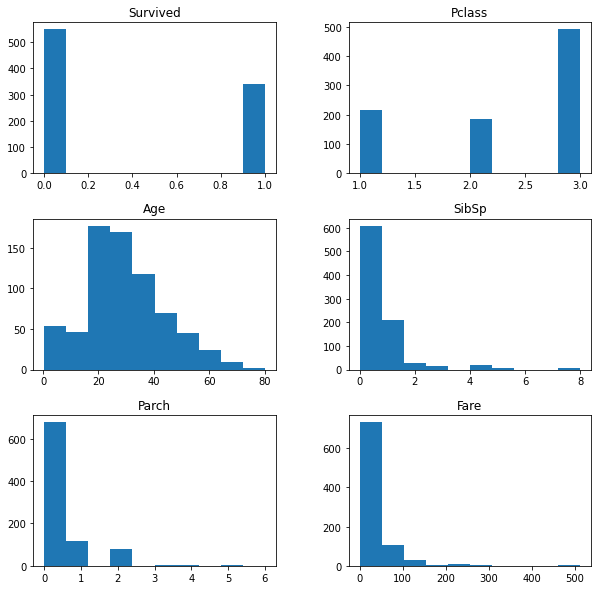

In [66]:
train_df.hist(figsize=(10,10),grid=False)

<AxesSubplot:>

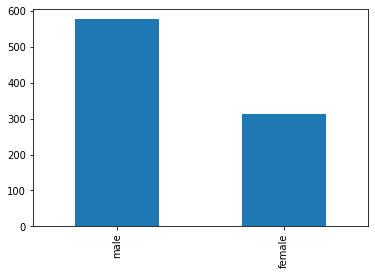

In [67]:
train_df['Sex'].value_counts().plot(kind='bar')

<AxesSubplot:>

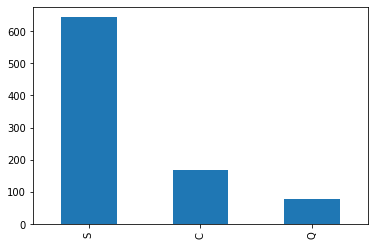

In [48]:
train_df['Embarked'].value_counts().plot(kind='bar')

In [81]:
# corr_matrix=train_data.corr()
# corr_matrix['Survived'].sort_values(ascending=False)

In [82]:
# from pandas.plotting import scatter_matrix

# attr=['Survived','Fare','Parch','Age','Pclass']
# scatter_matrix(train_data[attr],figsize=(12,12));



In [83]:
train_X=train_data.drop('Survived',axis=1)
train_y=train_data['Survived']

In [95]:
from sklearn.impute import SimpleImputer


imp_mean=SimpleImputer(strategy='mean')
data_num=train_data[['Pclass','Age','SibSp','Parch','Fare']]
imp_mean.fit(data_num)
X=imp_mean.transform(data_num)
housing_tr=pd.DataFrame(X, columns=data_num.columns,index=train_data.index)
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    float64
 1   Age     891 non-null    float64
 2   SibSp   891 non-null    float64
 3   Parch   891 non-null    float64
 4   Fare    891 non-null    float64
dtypes: float64(5)
memory usage: 34.9 KB


In [97]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')) ,
    ('std_scaler', StandardScaler())
])

train_df_tr=num_pipeline.fit_transform(data_num)

from sklearn.compose

In [19]:
from sklearn.model_selection import train_test_split


train_data['Age']=train_data['Age'].fillna(train_data['Age'].median()) #use mean for missing values
train_data.loc[train_data[train_data.Embarked.isna()].index.tolist(),'Embarked']='S'

test_data.Age = test_data.Age.fillna(test_data.Age.median())
test_data.Fare=test_data.Fare.fillna(test_data.Fare.median())



features=['Pclass','Sex','Age','SibSp','Parch','Fare']

X=pd.get_dummies(train_data[features])
y=train_data.Survived

test_X=pd.get_dummies(test_data[features])

train_X,val_X,train_y,val_y=train_test_split(X,y,random_state=0)

In [20]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,3,22.0,1,0,7.2500,0,1
1,1,38.0,1,0,71.2833,1,0
2,3,26.0,0,0,7.9250,1,0
3,1,35.0,1,0,53.1000,1,0
4,3,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1
887,1,19.0,0,0,30.0000,1,0
888,3,28.0,1,2,23.4500,1,0
889,1,26.0,0,0,30.0000,0,1


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

forest_model = RandomForestClassifier(random_state=0)
forest_model.fit(train_X,train_y)

predict_val = forest_model.predict(val_X)
print(accuracy_score(val_y,predict_val)*100,'%')

82.95964125560538 %


In [22]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(random_state=0,learning_rate_init=0.001,max_iter=500)
mlp_model.fit(train_X,train_y)

predict_val = mlp_model.predict(val_X)
print(accuracy_score(val_y,predict_val)*100,'%')

81.16591928251121 %


In [23]:
full_forest_model = RandomForestClassifier(random_state=0)
full_forest_model.fit(X,y)

predict_test = full_forest_model.predict(test_X)

In [24]:
submission = pd.DataFrame({'PassengerId':test_data.PassengerId,'Survived':predict_test})
submission.to_csv('submission.csv',index=False)